In [21]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
import seaborn as sns

In [22]:
inputData = pd.read_excel(r'/Users/sunainarangarajan/Desktop/Volumetric_features.xlsx', engine='openpyxl')
inputData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [23]:
# X is the input brain volume and y is the output age 
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

# 80%/20% split of training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)


In [24]:
from sklearn.linear_model import Ridge

# create linear regression model 
rid = Ridge(alpha=0.5)

# fit the model 
rid.fit(X_train, y_train)

Ridge(alpha=0.5)

In [36]:
# check the performance on test data
prediction1 = rid.predict(X_test)

R2 = metrics.r2_score(y_test, prediction1)
MSE = metrics.mean_squared_error(y_test, prediction1)
VAR = metrics.explained_variance_score(y_test, prediction1)

# compare predictions to known values
print('R Squared Value:', R2)
print('Mean Squared Error:', MSE)
print('Explained Variance:', VAR)


R Squared Value: 0.8596440117792776
Mean Squared Error: 57.43926209866968
Explained Variance: 0.8600721956338221


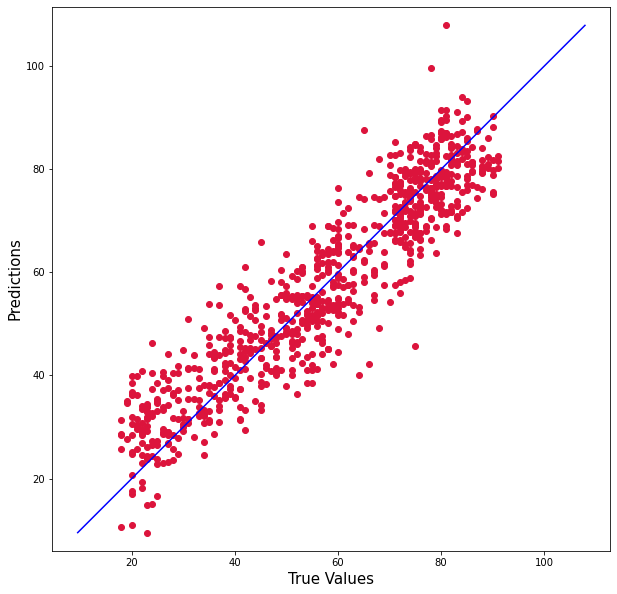

In [38]:
# plot the true values against the predictions for analysis 

plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction1, c='crimson')

p1 = max(max(prediction1), max(y_test))
p2 = min(min(prediction1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [30]:
from catboost import CatBoostRegressor

# create a linear regression model 
linreg = CatBoostRegressor()

# fit the model 
linreg.fit(X_train, y_train)




Learning rate set to 0.04963
0:	learn: 19.3627119	total: 72.8ms	remaining: 1m 12s
1:	learn: 18.7319149	total: 79.7ms	remaining: 39.8s
2:	learn: 18.1179901	total: 86.2ms	remaining: 28.6s
3:	learn: 17.5230454	total: 92.7ms	remaining: 23.1s
4:	learn: 16.9442725	total: 99.1ms	remaining: 19.7s
5:	learn: 16.4250730	total: 105ms	remaining: 17.5s
6:	learn: 15.9089577	total: 112ms	remaining: 15.9s
7:	learn: 15.4505757	total: 118ms	remaining: 14.7s
8:	learn: 14.9918504	total: 124ms	remaining: 13.7s
9:	learn: 14.5650204	total: 131ms	remaining: 13s
10:	learn: 14.1809535	total: 139ms	remaining: 12.5s
11:	learn: 13.7809089	total: 145ms	remaining: 12s
12:	learn: 13.4264849	total: 151ms	remaining: 11.5s
13:	learn: 13.0720496	total: 158ms	remaining: 11.1s
14:	learn: 12.7441150	total: 164ms	remaining: 10.8s
15:	learn: 12.4365882	total: 170ms	remaining: 10.5s
16:	learn: 12.1490050	total: 177ms	remaining: 10.2s
17:	learn: 11.8823522	total: 184ms	remaining: 10s
18:	learn: 11.6361973	total: 191ms	remaining:

185:	learn: 5.7896126	total: 1.4s	remaining: 6.14s
186:	learn: 5.7788538	total: 1.41s	remaining: 6.13s
187:	learn: 5.7674380	total: 1.42s	remaining: 6.12s
188:	learn: 5.7575709	total: 1.43s	remaining: 6.12s
189:	learn: 5.7496620	total: 1.43s	remaining: 6.11s
190:	learn: 5.7352015	total: 1.44s	remaining: 6.1s
191:	learn: 5.7255518	total: 1.45s	remaining: 6.09s
192:	learn: 5.7163883	total: 1.45s	remaining: 6.08s
193:	learn: 5.7065765	total: 1.46s	remaining: 6.07s
194:	learn: 5.6971990	total: 1.47s	remaining: 6.05s
195:	learn: 5.6874241	total: 1.47s	remaining: 6.04s
196:	learn: 5.6745631	total: 1.48s	remaining: 6.03s
197:	learn: 5.6610941	total: 1.49s	remaining: 6.02s
198:	learn: 5.6499773	total: 1.49s	remaining: 6.01s
199:	learn: 5.6336378	total: 1.5s	remaining: 6s
200:	learn: 5.6215519	total: 1.5s	remaining: 5.99s
201:	learn: 5.6117169	total: 1.51s	remaining: 5.97s
202:	learn: 5.6017404	total: 1.52s	remaining: 5.96s
203:	learn: 5.5886248	total: 1.52s	remaining: 5.95s
204:	learn: 5.57804

361:	learn: 4.2543098	total: 2.59s	remaining: 4.57s
362:	learn: 4.2478341	total: 2.6s	remaining: 4.57s
363:	learn: 4.2418037	total: 2.61s	remaining: 4.56s
364:	learn: 4.2356099	total: 2.62s	remaining: 4.55s
365:	learn: 4.2275338	total: 2.62s	remaining: 4.54s
366:	learn: 4.2223156	total: 2.63s	remaining: 4.54s
367:	learn: 4.2144729	total: 2.64s	remaining: 4.53s
368:	learn: 4.2075444	total: 2.64s	remaining: 4.52s
369:	learn: 4.1998763	total: 2.65s	remaining: 4.51s
370:	learn: 4.1943726	total: 2.66s	remaining: 4.51s
371:	learn: 4.1885408	total: 2.67s	remaining: 4.5s
372:	learn: 4.1827904	total: 2.67s	remaining: 4.49s
373:	learn: 4.1763333	total: 2.68s	remaining: 4.48s
374:	learn: 4.1716152	total: 2.69s	remaining: 4.48s
375:	learn: 4.1653670	total: 2.69s	remaining: 4.47s
376:	learn: 4.1573182	total: 2.7s	remaining: 4.46s
377:	learn: 4.1506026	total: 2.71s	remaining: 4.45s
378:	learn: 4.1437535	total: 2.71s	remaining: 4.44s
379:	learn: 4.1399996	total: 2.72s	remaining: 4.44s
380:	learn: 4.1

534:	learn: 3.2875428	total: 3.79s	remaining: 3.29s
535:	learn: 3.2834030	total: 3.8s	remaining: 3.29s
536:	learn: 3.2804152	total: 3.8s	remaining: 3.28s
537:	learn: 3.2754300	total: 3.81s	remaining: 3.27s
538:	learn: 3.2701970	total: 3.82s	remaining: 3.27s
539:	learn: 3.2652074	total: 3.83s	remaining: 3.26s
540:	learn: 3.2606239	total: 3.83s	remaining: 3.25s
541:	learn: 3.2575151	total: 3.84s	remaining: 3.24s
542:	learn: 3.2547647	total: 3.85s	remaining: 3.24s
543:	learn: 3.2505933	total: 3.85s	remaining: 3.23s
544:	learn: 3.2471512	total: 3.86s	remaining: 3.22s
545:	learn: 3.2417248	total: 3.87s	remaining: 3.21s
546:	learn: 3.2385728	total: 3.87s	remaining: 3.21s
547:	learn: 3.2336521	total: 3.88s	remaining: 3.2s
548:	learn: 3.2294757	total: 3.89s	remaining: 3.19s
549:	learn: 3.2266244	total: 3.89s	remaining: 3.19s
550:	learn: 3.2230561	total: 3.9s	remaining: 3.18s
551:	learn: 3.2172237	total: 3.91s	remaining: 3.17s
552:	learn: 3.2111922	total: 3.92s	remaining: 3.17s
553:	learn: 3.20

711:	learn: 2.6020751	total: 4.99s	remaining: 2.02s
712:	learn: 2.5988591	total: 4.99s	remaining: 2.01s
713:	learn: 2.5954718	total: 5s	remaining: 2s
714:	learn: 2.5921453	total: 5.01s	remaining: 2s
715:	learn: 2.5881206	total: 5.01s	remaining: 1.99s
716:	learn: 2.5857568	total: 5.02s	remaining: 1.98s
717:	learn: 2.5829913	total: 5.03s	remaining: 1.98s
718:	learn: 2.5791341	total: 5.04s	remaining: 1.97s
719:	learn: 2.5765983	total: 5.04s	remaining: 1.96s
720:	learn: 2.5737556	total: 5.05s	remaining: 1.95s
721:	learn: 2.5702167	total: 5.05s	remaining: 1.95s
722:	learn: 2.5669895	total: 5.06s	remaining: 1.94s
723:	learn: 2.5640292	total: 5.07s	remaining: 1.93s
724:	learn: 2.5608586	total: 5.07s	remaining: 1.92s
725:	learn: 2.5586771	total: 5.08s	remaining: 1.92s
726:	learn: 2.5540930	total: 5.09s	remaining: 1.91s
727:	learn: 2.5498489	total: 5.09s	remaining: 1.9s
728:	learn: 2.5447165	total: 5.1s	remaining: 1.9s
729:	learn: 2.5411459	total: 5.11s	remaining: 1.89s
730:	learn: 2.5378995	to

893:	learn: 2.1084390	total: 6.18s	remaining: 732ms
894:	learn: 2.1061125	total: 6.18s	remaining: 726ms
895:	learn: 2.1042336	total: 6.19s	remaining: 719ms
896:	learn: 2.1021791	total: 6.2s	remaining: 712ms
897:	learn: 2.0992394	total: 6.21s	remaining: 705ms
898:	learn: 2.0967622	total: 6.21s	remaining: 698ms
899:	learn: 2.0941450	total: 6.22s	remaining: 691ms
900:	learn: 2.0912241	total: 6.23s	remaining: 684ms
901:	learn: 2.0873950	total: 6.23s	remaining: 677ms
902:	learn: 2.0843610	total: 6.24s	remaining: 670ms
903:	learn: 2.0816224	total: 6.25s	remaining: 664ms
904:	learn: 2.0791872	total: 6.25s	remaining: 657ms
905:	learn: 2.0775183	total: 6.26s	remaining: 650ms
906:	learn: 2.0762952	total: 6.27s	remaining: 643ms
907:	learn: 2.0738002	total: 6.28s	remaining: 636ms
908:	learn: 2.0718934	total: 6.28s	remaining: 629ms
909:	learn: 2.0688681	total: 6.29s	remaining: 622ms
910:	learn: 2.0663033	total: 6.29s	remaining: 615ms
911:	learn: 2.0659885	total: 6.3s	remaining: 608ms
912:	learn: 2.

In [31]:
# check performance on test data
prediction2 = linreg.predict(X_test)

R2 = metrics.r2_score(y_test, prediction2)
MSE = metrics.mean_squared_error(y_test, prediction2)
VAR = metrics.explained_variance_score(y_test, prediction2)

# compare the predictions to the known values (y_test)
print('R Squared Value:', R2)
print('Mean Squared Error:', MSE)
print('Explained Variance:', VAR)

R Squared Value: 0.893462988605658
Mean Squared Error: 43.599189448655736
Explained Variance: 0.893909131872089


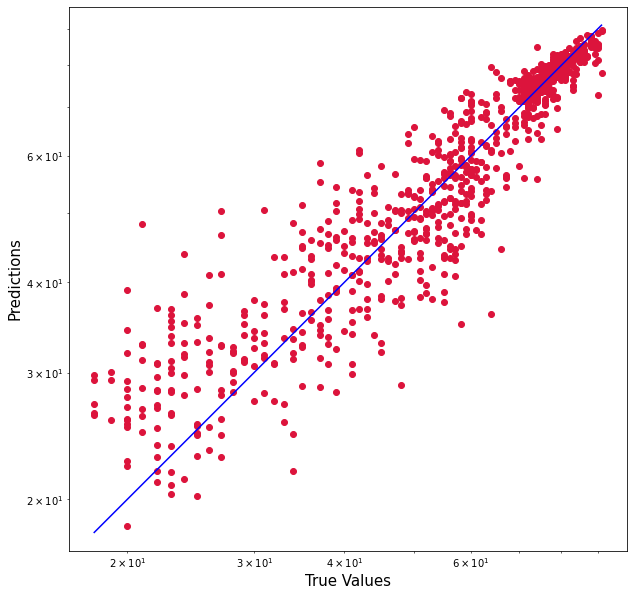

In [32]:
# plot the true values against the predictions for analysis 

plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction2, c='crimson')

p1 = max(max(prediction2), max(y_test))
p2 = min(min(prediction2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [39]:
from sklearn.linear_model import BayesianRidge

# create linear regression model 
bayrid = BayesianRidge()

# fit model to training data
bayrid.fit(X_train, y_train)

BayesianRidge()

In [40]:
# check performance on test data
prediction3 = bayrid.predict(X_test)

R2 = metrics.r2_score(y_test, prediction3)
MSE = metrics.mean_squared_error(y_test, prediction3)
VAR = metrics.explained_variance_score(y_test, prediction3)

# compare predictions to the known values
print('R Squared Value:', R2)
print('Mean Squared Error:', MSE)
print('Explained Variance:', VAR)

R Squared Value: 0.8598347585345392
Mean Squared Error: 57.36120092715263
Explained Variance: 0.8601419042926258


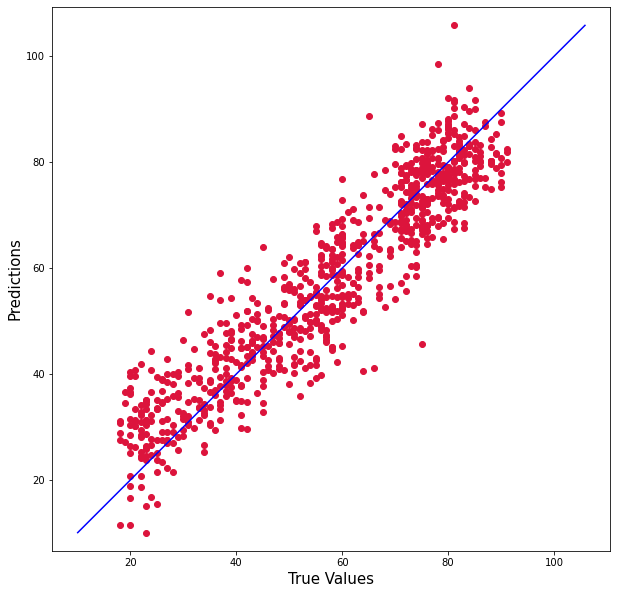

In [41]:
# plot the true values against the predictions for analysis

plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction3, c='crimson')

p1 = max(max(prediction3), max(y_test))
p2 = min(min(prediction3), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()